In [2]:
print("""
FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 6
Number of the dataset : 5
""")


FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 6
Number of the dataset : 5



### LIBRARIES

In [3]:
import networkx as nx
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import random

### DATA LOADING

In [4]:
# Correct URLs pointing to the raw files on GitHub
facebook_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Facebook-Ego/686.edges"
twitter_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Twitter-Ego/1435461.edges"

# Download the Facebook-Ego network file
urllib.request.urlretrieve(facebook_url, "facebook.edges")
# Load the Facebook-Ego network as an undirected graph
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Download the Twitter-Ego network file
#urllib.request.urlretrieve(twitter_url, "twitter.edges")
# Load the Twitter-Ego network as a directed graph
#twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

### a) calculate the cut size and conductance between the two sets of nodes, then plot the partitioning.

/var/folders/f2/9svl2vhs7zv85_7q56myyq5jr977fc/T/ipykernel_69351/4153168885.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  set2 = set(random.sample(set(nodes) - set1, 50))


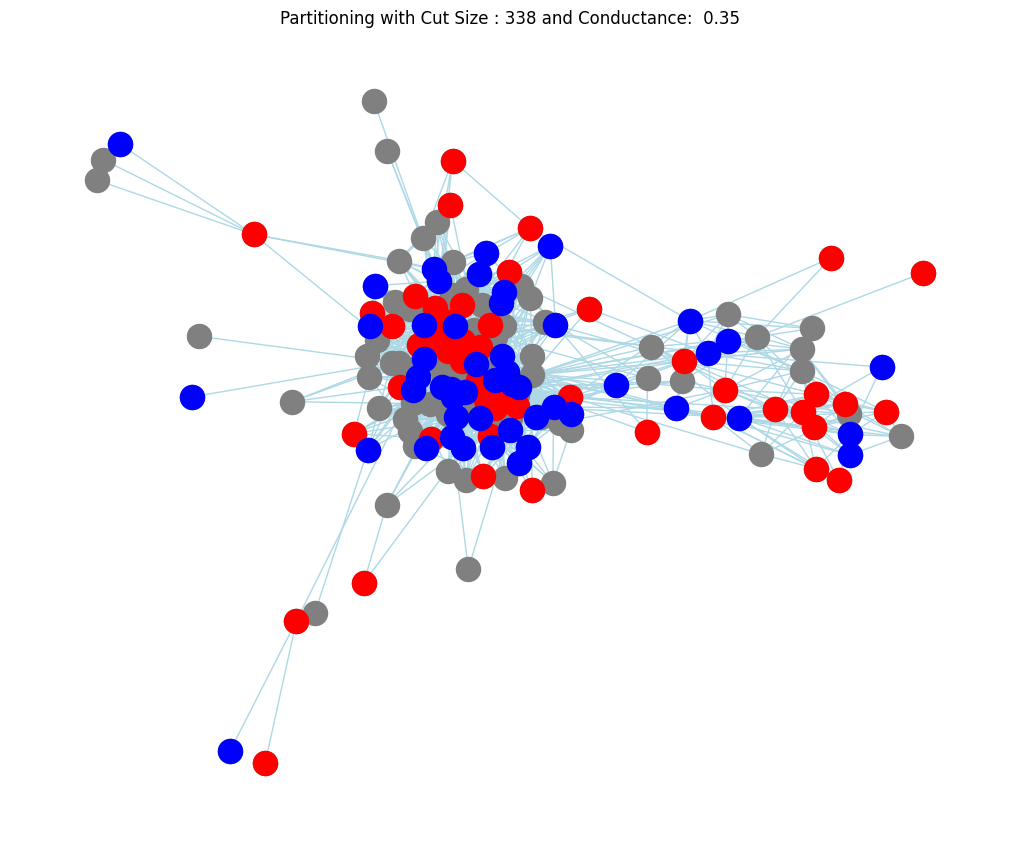

In [7]:
#Random selection of two sets of 50 nodes:

nodes = list(facebook_network.nodes())
set1 = set(random.sample(nodes, 50))
set2 = set(random.sample(set(nodes) - set1, 50)) 

#Calculate cut size and conductance:

cut_size = nx.cut_size(facebook_network, set1, set2)
    
#Calculate the conductance:

volume_1 = nx.volume (facebook_network, set1)
volume_2 = nx.volume (facebook_network, set2)
conductance = cut_size / min(volume_1, volume_2)

#plot the partitioning:

pos = nx.spring_layout(facebook_network)
plt.figure(figsize = (10, 8))
nx.draw(facebook_network, pos, node_color = 'grey', edge_color = 'lightblue', with_labels = False)
nx.draw_networkx_nodes(facebook_network, pos, nodelist = set1, node_color = 'red')
nx.draw_networkx_nodes(facebook_network, pos, nodelist = set2, node_color = 'blue')
plt.title(f"Partitioning with Cut Size : {cut_size} and Conductance: {conductance: .2f}")
plt.show()




### b) Differences observed and its causes

/var/folders/f2/9svl2vhs7zv85_7q56myyq5jr977fc/T/ipykernel_69351/230412846.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  repetition_set2 = set(random.sample(set(nodes) - repetition_set1, 50))


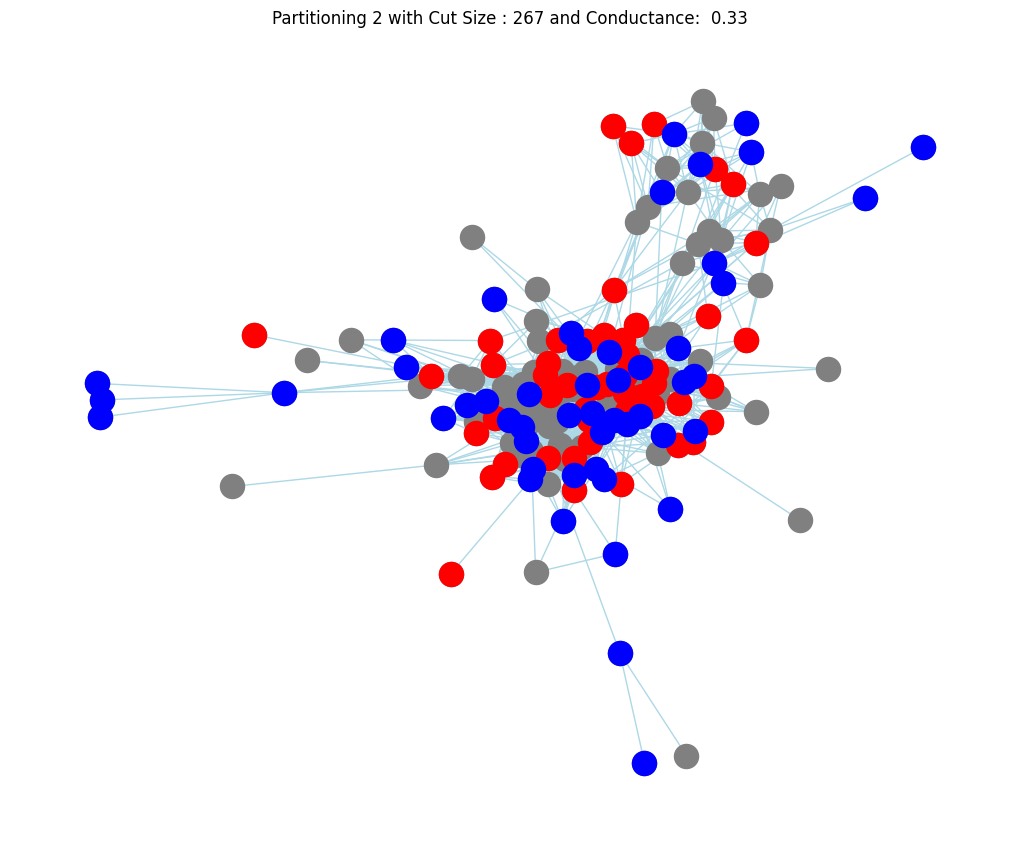

In [6]:
nodes = list(facebook_network.nodes())
repetition_set1 = set(random.sample(nodes, 50))
repetition_set2 = set(random.sample(set(nodes) - repetition_set1, 50)) 

#Calculate cut size and conductance:

cut_size2 = nx.cut_size(facebook_network, repetition_set1,repetition_set2 )
    
#Calculate the conductance:

volume_1 = nx.volume (facebook_network, repetition_set1)
volume_2 = nx.volume (facebook_network, repetition_set2)
conductance2 = cut_size2 / min(volume_1, volume_2)

#plot the partitioning:

pos = nx.spring_layout(facebook_network)
plt.figure(figsize = (10, 8))
nx.draw(facebook_network, pos, node_color = 'grey', edge_color = 'lightblue', with_labels = False)
nx.draw_networkx_nodes(facebook_network, pos, nodelist = repetition_set1, node_color = 'red')
nx.draw_networkx_nodes(facebook_network, pos, nodelist = repetition_set2, node_color = 'blue')
plt.title(f"Partitioning 2 with Cut Size : {cut_size2} and Conductance: {conductance2: .2f}")
plt.show()

In [10]:
#Causes :
print ("""
       The observed differences between the two partitions relate to both the cut size and the conductance values:

1. Cut Size: In the first partition, the cut size is 338, while in the second partition, it is 267. 
The cut size measures the number of edges connecting nodes across the two sets. This difference suggests that
in the first partition, the chosen sets of nodes have more interconnecting edges than in the second partition. 

2. Conductance: The conductance values are 0.35 for the first partition and 0.33 for the second. Lower conductance 
generally indicates that the two sets of nodes are more isolated from each other in terms of edges, suggesting that 
the second partition is a slightly better separation of the network’s structure. 

 Causes of the Differences
These differences arise from the inherent structure and community patterns within the Facebook-Ego network. Facebook-Ego 
networks tend to have dense clusters where friends are highly interconnected, forming communities. Randomly chosen node sets
may fall across or within these community boundaries to varying extents, affecting both cut size and conductance. When node 
sets are within community boundaries, there will be fewer connections (and thus a lower cut size) between them, resulting in 
lower conductance. 
""")


       The observed differences between the two partitions relate to both the cut size and the conductance values:

1. Cut Size: In the first partition, the cut size is 338, while in the second partition, it is 267. 
The cut size measures the number of edges connecting nodes across the two sets. This difference suggests that
in the first partition, the chosen sets of nodes have more interconnecting edges than in the second partition. 

2. Conductance: The conductance values are 0.35 for the first partition and 0.33 for the second. Lower conductance 
generally indicates that the two sets of nodes are more isolated from each other in terms of edges, suggesting that 
the second partition is a slightly better separation of the network’s structure. 

 Causes of the Differences
These differences arise from the inherent structure and community patterns within the Facebook-Ego network. Facebook-Ego 
networks tend to have dense clusters where friends are highly interconnected, forming communit

### c) Output Laplacian matrix of Facebook_Edge dataset

In [8]:
laplacian_matrix = nx.laplacian_matrix(facebook_network)
print("Laplacian matrix is: ")
print(laplacian_matrix.toarray())


Laplacian matrix is: 
[[44 -1 -1 ...  0  0  0]
 [-1 35 -1 ...  0  0  0]
 [-1 -1 51 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


### d) List of all cliques over the entire dataset Facebook_Edge 

In [9]:
cliques = list(nx.find_cliques(facebook_network))
print(f"Number of cliques: {len(cliques)}")
print("-----------------------------------------------------")
print("The list of cliques is : ")
print(cliques)

Number of cliques: 1115
-----------------------------------------------------
The list of cliques is : 
[[689, 839, 714, 789, 712], [689, 839, 714, 789, 732, 771], [689, 839, 714, 789, 732, 702], [690, 773, 853, 694, 713, 784, 731], [690, 773, 853, 694, 713, 831], [690, 773, 853, 694, 820, 831], [691, 833, 746, 782], [691, 771], [691, 822], [695, 711, 853, 694, 745, 842, 784, 738, 724, 829, 752], [695, 711, 853, 694, 745, 842, 784, 738, 724, 829, 696], [695, 711, 853, 694, 745, 842, 784, 810, 752], [695, 711, 853, 694, 745, 847, 752, 810], [695, 711, 853, 694, 745, 847, 752, 829], [695, 711, 853, 694, 766, 752, 784, 810], [695, 711, 853, 694, 766, 752, 784, 724], [695, 711, 853, 694, 766, 752, 847, 810], [695, 713, 834, 778, 696, 724, 830], [695, 713, 834, 778, 726, 693, 844], [695, 713, 834, 778, 726, 830, 724, 701], [695, 713, 834, 778, 726, 830, 844], [695, 713, 834, 844, 726, 824, 697, 805], [695, 713, 834, 844, 726, 824, 697, 830], [695, 713, 834, 844, 726, 824, 697, 693], [695, 7